#### Request the novel Peter Pan from Project Gutenberg.org

In [1]:
import requests
import os
import shutil 

In [7]:
url = "https://www.gutenberg.org/files/16/16-h/16-h.htm"
page = requests.get(url)
page

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\r\n"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />\r\n<meta http-equiv="Content-Style-Type" content="text/css" />\r\n<title>The Project Gutenberg eBook of Peter Pan, by James M. Barrie</title>\r\n\r\n<style type="text/css">\r\n\r\nbody { margin-left: 20%;\r\n       margin-right: 20%;\r\n       text-align: justify; }\r\n\r\nh1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:\r\nnormal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}\r\n\r\nh1 {font-size: 300%;\r\n    margin-top: 0.6em;\r\n    margin-bottom: 0.6em;\r\n    letter-spacing: 0.12em;\r\n    word-spacing: 0.2em;\r\n    text-indent: 0em;}\r\nh2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}\r\nh3 {font-size: 130%; margin-top: 1em;}\r\nh4 {font-size: 120%;}\r\nh5 {font-size: 11

In [10]:
with open("peterpan.html","w+") as f:
    f.write(page.text)

#### Parse the html file using BeautifulSoup

In [79]:
from bs4 import BeautifulSoup 

In [80]:
with open("peterpan.html") as f:
    page=f.read()
soup = BeautifulSoup(page,"html.parser")

In [81]:
for script in soup(["script", "style"]):
    script.extract()    # rip it out

soup.find("p",class_="letter").decompose() # I don't need the letter part. It is not part of the book

In [82]:
paragraphs=soup.find_all("p")

paragraphs

[<p>
 
 All children, except one, grow up. They soon know that they will grow up, and
 
 the way Wendy knew was this. One day when she was two years old she was playing
 
 in a garden, and she plucked another flower and ran with it to her mother. I
 
 suppose she must have looked rather delightful, for Mrs. Darling put her hand
 
 to her heart and cried, “Oh, why can’t you remain like this for
 
 ever!” This was all that passed between them on the subject, but
 
 henceforth Wendy knew that she must grow up. You always know after you are two.
 
 Two is the beginning of the end.
 
 </p>,
 <p>
 
 Of course they lived at 14, and until Wendy came her mother was the chief one.
 
 She was a lovely lady, with a romantic mind and such a sweet mocking mouth. Her
 
 romantic mind was like the tiny boxes, one within the other, that come from the
 
 puzzling East, however many you discover there is always one more; and her
 
 sweet mocking mouth had one kiss on it that Wendy could never get, though

In [89]:
novel=""
for p in paragraphs:
    novel= novel+p.get_text()
#novel=paragraphs[0].get_text()+paragraphs[1].get_text()

In [90]:
print(novel)



All children, except one, grow up. They soon know that they will grow up, and

the way Wendy knew was this. One day when she was two years old she was playing

in a garden, and she plucked another flower and ran with it to her mother. I

suppose she must have looked rather delightful, for Mrs. Darling put her hand

to her heart and cried, “Oh, why can’t you remain like this for

ever!” This was all that passed between them on the subject, but

henceforth Wendy knew that she must grow up. You always know after you are two.

Two is the beginning of the end.



Of course they lived at 14, and until Wendy came her mother was the chief one.

She was a lovely lady, with a romantic mind and such a sweet mocking mouth. Her

romantic mind was like the tiny boxes, one within the other, that come from the

puzzling East, however many you discover there is always one more; and her

sweet mocking mouth had one kiss on it that Wendy could never get, though there

it was, perfectly conspicuous in t

#### Cleaning the text

In [91]:
import string
import re # used to work with Regular Expressions.
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [92]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SERRA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
text="!!!!!Two is the beginning of the end. Of course they lived at 14, and until Wendy came her mother was the chief one."

In [94]:
def clean_text(text):
        # get rid of the puntuations, numbers
        text=text.lower()
        character = string.punctuation + string.digits
        for i in character:
                text=text.replace(i,"")
                
        text=re.sub('\s+', ' ', text).strip() # replaces multiple spaces, newline tabs with a single space
                                        # regular expression for space
        tokens=text.split(" ")
        
        clean_words=[]
        #get rid of the stopwords
        for word in tokens:
                if word not in stop_words:
                        clean_words.append(word)

        return clean_words

In [95]:
clean_words=clean_text(text)

In [96]:
novel_words=clean_text(novel)

In [97]:
print(novel_words)

['children', 'except', 'one', 'grow', 'soon', 'know', 'grow', 'way', 'wendy', 'knew', 'one', 'day', 'two', 'years', 'old', 'playing', 'garden', 'plucked', 'another', 'flower', 'ran', 'mother', 'suppose', 'must', 'looked', 'rather', 'delightful', 'mrs', 'darling', 'put', 'hand', 'heart', 'cried', '“oh', 'can’t', 'remain', 'like', 'ever”', 'passed', 'subject', 'henceforth', 'wendy', 'knew', 'must', 'grow', 'always', 'know', 'two', 'two', 'beginning', 'end', 'course', 'lived', 'wendy', 'came', 'mother', 'chief', 'one', 'lovely', 'lady', 'romantic', 'mind', 'sweet', 'mocking', 'mouth', 'romantic', 'mind', 'like', 'tiny', 'boxes', 'one', 'within', 'come', 'puzzling', 'east', 'however', 'many', 'discover', 'always', 'one', 'sweet', 'mocking', 'mouth', 'one', 'kiss', 'wendy', 'could', 'never', 'get', 'though', 'perfectly', 'conspicuous', 'righthand', 'corner', 'way', 'mr', 'darling', 'many', 'gentlemen', 'boys', 'girl', 'discovered', 'simultaneously', 'loved', 'ran', 'house', 'propose', 'exce

#### Use countVectorizer to find the most common words in the novel

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

In [101]:
cv=CountVectorizer()
cv.fit(novel_words)

CountVectorizer()

In [115]:
cv.vocabulary_

{'children': 708,
 'except': 1423,
 'one': 2867,
 'grow': 1863,
 'soon': 3843,
 'know': 2317,
 'way': 4606,
 'wendy': 4627,
 'knew': 2308,
 'day': 1032,
 'two': 4421,
 'years': 4765,
 'old': 2861,
 'playing': 3071,
 'garden': 1731,
 'plucked': 3081,
 'another': 145,
 'flower': 1625,
 'ran': 3275,
 'mother': 2656,
 'suppose': 4072,
 'must': 2693,
 'looked': 2448,
 'rather': 3286,
 'delightful': 1079,
 'mrs': 2676,
 'darling': 1018,
 'put': 3228,
 'hand': 1913,
 'heart': 1959,
 'cried': 943,
 'oh': 2859,
 'can': 604,
 'remain': 3359,
 'like': 2407,
 'ever': 1408,
 'passed': 2954,
 'subject': 4036,
 'henceforth': 1985,
 'always': 117,
 'beginning': 356,
 'end': 1352,
 'course': 911,
 'lived': 2432,
 'came': 602,
 'chief': 704,
 'lovely': 2471,
 'lady': 2329,
 'romantic': 3456,
 'mind': 2606,
 'sweet': 4103,
 'mocking': 2634,
 'mouth': 2667,
 'tiny': 4280,
 'boxes': 479,
 'within': 4709,
 'come': 792,
 'puzzling': 3232,
 'east': 1302,
 'however': 2058,
 'many': 2525,
 'discover': 1165,
 'k

In [111]:
most_common_word= max(cv.vocabulary_, key=lambda x: cv.vocabulary_[x])
most_common_word

'zone'

In [118]:
len(cv.vocabulary_)

4784

In [151]:
a=sorted(cv.vocabulary_.items(), key=lambda x:x[1],reverse=True)

In [146]:
import matplotlib.pyplot as plt 

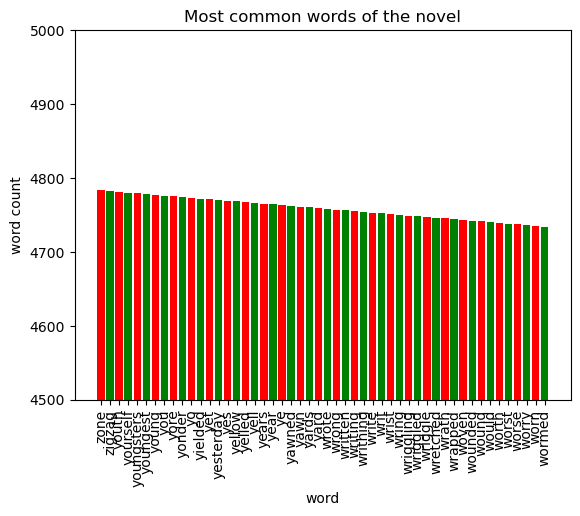

In [173]:
x=[]
y=[]
for i in range(50):
    x.append(a[i][0])
    y.append(a[i][1])

plt.ylim(4500,5000)
 
plt.bar(x, y,width = 0.8,color = ['red', 'green'])

plt.xlabel('word') 
plt.ylabel('word count') 

plt.xticks(rotation=90)
plt.title('Most common words of the novel') 
plt.show() 
